In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 1. Đọc dữ liệu vào df_A Tạo 2 dataframe df_train, df_test từ df_train df_train: 80% ngẫu nhiên được lấy từ df_A df_test: 20% còn lại

df_A = pd.read_csv('./exFuelConsumption.csv')
df_A.head()

,MODELYEAR,MAKE,MODEL,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2014,ACURA,ILX,2.0,4,9.9,196
1,2014,ACURA,ILX,2.4,4,11.2,221
2,2014,ACURA,ILX HYBRID,1.5,4,6.0,136
3,2014,ACURA,MDX 4WD,3.5,6,12.7,255
4,2014,ACURA,RDX AWD,3.5,6,12.1,244


In [3]:
df_train = df_A.sample(frac = 0.8)
df_train.head()


,MODELYEAR,MAKE,MODEL,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
689,2014,MASERATI,GHIBLI AWD,3.0,6,15.2,292
41,2014,AUDI,Q5 TDI CLEAN DIESEL,3.0,6,10.3,246
382,2014,FORD,F150 FFV,5.0,8,22.1,315
824,2014,MITSUBISHI,MIRAGE,1.2,3,6.4,138
1060,2014,VOLVO,S80 AWD,3.0,6,13.2,264


In [4]:
df_test = df_A[~df_A.isin(df_train)].dropna()
df_test.head()

,MODELYEAR,MAKE,MODEL,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
1,2014.0,ACURA,ILX,2.4,4.0,11.2,221.0
5,2014.0,ACURA,RLX,3.5,6.0,11.9,230.0
15,2014.0,ASTON MARTIN,V8 VANTAGE,4.7,8.0,18.1,354.0
17,2014.0,ASTON MARTIN,V8 VANTAGE S,4.7,8.0,18.1,354.0
21,2014.0,AUDI,A4 QUATTRO,2.0,4.0,10.8,214.0


In [5]:
from numpy import linalg

# 2. Sử dụng ma trận giả đảo để dự báo CO2 Emission theo 3 features Enginesize, Cylinders, FuelConsumption theo từng bước sau:
X = df_train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY']]
X.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY
689,3.0,6,15.2
41,3.0,6,10.3
382,5.0,8,22.1
824,1.2,3,6.4
1060,3.0,6,13.2


In [6]:
X_inv = linalg.pinv(X)
X_inv

array([[-2.29317776e-03, -1.51977279e-03,  3.35305841e-04, ...,
        -2.07056769e-03, -2.73965386e-03,  1.85035760e-03],
       [ 6.85912739e-04,  2.15959706e-03, -1.46029153e-03, ...,
         1.19289518e-03,  4.89062273e-03, -1.22537559e-03],
       [ 3.82502449e-04, -4.75167472e-04,  6.73062427e-04, ...,
         7.06930799e-05, -1.28290083e-03,  1.70620940e-04]])

In [7]:
y = df_train['CO2EMISSIONS']
y.head()

689     292
41      246
382     315
824     138
1060    264
Name: CO2EMISSIONS, dtype: int64

In [8]:
w = X_inv @ y
w

array([-8.86612572, 21.90253206, 11.64596231])

In [9]:
w_engine_size = w[0]
w_cylinders = w[1]
w_fuel_consumption = w[2]

In [10]:
df_test['prediction_1'] = df_test['ENGINESIZE']*w_engine_size + df_test['CYLINDERS']*w_cylinders + df_test['FUELCONSUMPTION_CITY']*w_fuel_consumption
df_test.head()

,MODELYEAR,MAKE,MODEL,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS,prediction_1
1,2014.0,ACURA,ILX,2.4,4.0,11.2,221.0,196.766204
5,2014.0,ACURA,RLX,3.5,6.0,11.9,230.0,238.970704
15,2014.0,ASTON MARTIN,V8 VANTAGE,4.7,8.0,18.1,354.0,344.341383
17,2014.0,ASTON MARTIN,V8 VANTAGE S,4.7,8.0,18.1,354.0,344.341383
21,2014.0,AUDI,A4 QUATTRO,2.0,4.0,10.8,214.0,195.654270


<AxesSubplot:>

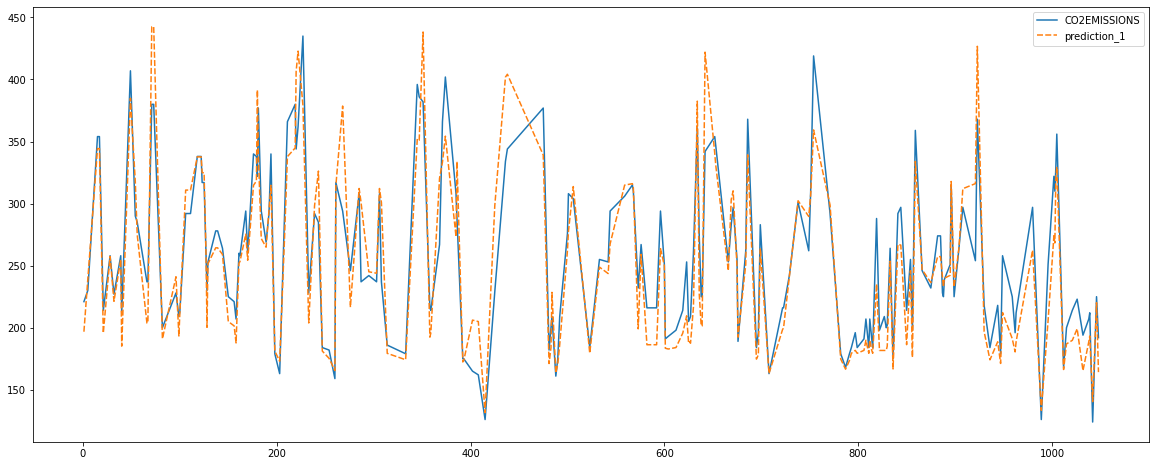

In [11]:
plt.figure(figsize=(20,8))
df_co2_pre_1 = df_test[['CO2EMISSIONS', 'prediction_1']]
sns.lineplot(data=df_co2_pre_1)

In [12]:
import sympy

x = sympy.Symbol('x')
y = sympy.Symbol('y')
z = sympy.Symbol('z')
theta = np.ones(4)
t = np.dot(np.array([1, x, y, z]), theta)
t


1.0*x + 1.0*y + 1.0*z + 1.0

In [18]:
# 3. Sử dụng Gradient Descent với 3 features Enginesize, Cylinders, FuelConsumption tính CO2 Emission
def gradient_descent_3(alpha, x, y, numIterations):
    m = x.shape[0]
    print('m:', m)
    theta = np.ones(x.shape[1])
    for iter in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        theta0_prime = np.sum(loss)/m
        theta1_prime = np.sum(loss * x[:, 1])/m
        theta2_prime = np.sum(loss * x[:, 2])/m
        theta3_prime = np.sum(loss * x[:, 3])/m

        gradient = np.array([theta0_prime, theta1_prime, theta2_prime, theta3_prime])
        theta = theta - alpha * gradient
        if iter == 0:
            print('hypothesis:\n', hypothesis)
            print('loss:\n', loss)
            print('gradient:\n', gradient)
            print('theta:\n', theta)
    return theta

In [20]:
alpha = 0.01
m, n = np.shape(X)
print('m', m)
print('n', n)
X = df_train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY']]
print('X', X)
x = np.c_[np.ones(m), X]
print('x', x)
y = df_train['CO2EMISSIONS']
print('y', y)
theta = gradient_descent_3(alpha, x, y, 1000)

print('final theta', theta)

m 854
n 3
X       ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY
689          3.0          6                  15.2
41           3.0          6                  10.3
382          5.0          8                  22.1
824          1.2          3                   6.4
1060         3.0          6                  13.2
...          ...        ...                   ...
149          2.0          4                  11.5
414          2.0          4                  10.9
250          1.8          4                   8.9
112          6.0         12                  18.7
240          5.3          8                  19.5

[854 rows x 3 columns]
x [[ 1.   3.   6.  15.2]
 [ 1.   3.   6.  10.3]
 [ 1.   5.   8.  22.1]
 ...
 [ 1.   1.8  4.   8.9]
 [ 1.   6.  12.  18.7]
 [ 1.   5.3  8.  19.5]]
y 689     292
41      246
382     315
824     138
1060    264
       ... 
149     228
414     216
250     182
112     356
240     270
Name: CO2EMISSIONS, Length: 854, dtype: int64
m: 854
hypothesis:
 [25.2 20.3 36.1 11

In [15]:
theta_zero = theta[0]
theta_engine_size = theta[1]
theta_cylinders = theta[2]
theta_fuel_consumption = theta[3]

df_test['prediction_2'] = df_test['ENGINESIZE']*theta_engine_size + df_test['CYLINDERS']*theta_cylinders + df_test['FUELCONSUMPTION_CITY']*theta_fuel_consumption + theta_zero
df_test.head()

,MODELYEAR,MAKE,MODEL,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS,prediction_1,prediction_2
1,2014.0,ACURA,ILX,2.4,4.0,11.2,221.0,196.766204,-3.268702e+159
5,2014.0,ACURA,RLX,3.5,6.0,11.9,230.0,238.970704,-3.711785e+159
15,2014.0,ASTON MARTIN,V8 VANTAGE,4.7,8.0,18.1,354.0,344.341383,-5.481985e+159
17,2014.0,ASTON MARTIN,V8 VANTAGE S,4.7,8.0,18.1,354.0,344.341383,-5.481985e+159
21,2014.0,AUDI,A4 QUATTRO,2.0,4.0,10.8,214.0,195.654270,-3.147969e+159
